## Buzz Prediction in Twitter Data
### Matthew Caulfield

### Abstract 
The goal of this project is to determine if a buzz event occurred about a topic on twitter in a seven-day window.  A paper by the University of Grenoble Joseph Fourier Laboratory of Information found they were able to predict the occurrence of a buzz event with approximately 90 percent accuracy using a random forest on the same data set. This paper was able to accurately predict the occurrence of a buzz event 93 percent of the time using a random forest after transforming the data. This paper also took into consideration run time [1]. 

### Introduction 
The goal of this data is to classify instances of twitter data to determine if a buzz event occured. The two classes for the data are buzz event and no buzz event. To do this the following things are examined about a topic over seven consecutive days: number of created discussions, author increase, attention Level measured with number of authors, burstiness level, number of atomic containers, attention level measured by number of contributors, contribution sparseness, author interactions, number of authors, and average discussion length. Using social media data to learn about societal interests is an important part of modern data science and twitter is a large social media platform. Being able to creat models about twitter usage is a useful tool. Some of the code used to run the tests are based off of code provided by Nick Webb to implement scikit learn. 


### Motivation 
The analysis of social media is currently being done by both the United States government and companies. Recently the United States military announced a project in which they were tracking how popular movements arise using social media. To do this they plan on analyzing 350 Billion posts. This research can be used both offensively and defensively for the United States Military. For example, the US military may use this information to create their own popular movement in a rival country or to defend the US from a rival country creating a popular movement in the US[2]. Companies use social media analyses to make money. There are multiple hedge funds who use twitter sentiments to predict stock movement [3], social media companies analyze user data to better target ads, and by 2025 the social media analytic industry is projected to reach $7.1 Billion[4].

With all of this in mind I think that it is very important to understand and analyze social media data. I chose this dataset because I thought it would be a good introduction to machine learning and data analytics on social media data. While the analysis being done on this data is just categorizing time intervals as whether a buzz event has occurred and does not cover user sentiment, it is a good introduction to social media data. This data set is learned on twitter data and demonstrates which attributes to look at when analyzing twitter data and social media data. This data set has been used by the University of Grenoble Joseph Fourier Laboratory of Information, where they found a random forest was able to categorize the data with an accuracy of 90 percent. 

### Data
The data was taken from the UC Irvine Machine Learning Repository and was compiled by the BestOfMedia Group. The data came with both Twitter and Tom's Hardware data, but this project is focused on prediction over the Twitter dataset. The data has no missing data in it contains 77 Attributes, 1 Class, and 140,707 rows of data. The data is taken over the course of seven consecutive days per instance. The 77 attributes can be broken down into 11 attributes taken over 11 days where each day is its own attribute. The 11 attributes are number of created discussions, author increase, attention Level measured with number of authors, burstiness level, number of atomic containers, attention level measured by number of contributors, contribution sparseness, author interactions, number of authors, and average discussion length. The one class is either a buzz event has occurred during a seven-day interval or no buzz event occurred, 81 percent of the instances have no buzz event and 19 percent of the instances have a buzz event occur. There is one research paper written on the data by the University of Grenoble Joseph Fourier Laboratory of Information, they found that with a random forest classifier they were able to accurately classify the data 90 percent of the time.

### Experiments
The first thing done to the data was applied a wide range of algorithms to the raw data. It did not make sense to normalize the data because multiple attributes covered the same topic but were over different time periods so the non-normalized number of unique contributors may be important. Using the raw data also gave a baseline of both time and accuracy. 


In [1]:
%matplotlib inline

# Pandas is an important data manipulation library
# You don't have to use it for your project, but I include it
# here so you know about it.
import time
import pandas
import matplotlib.pyplot as plt
from scipy import stats

# Import models

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

# And import the feature selection mechanism

from sklearn.feature_selection import RFE

#NCD is Number of Created Discussions
#AI is Author Increase
#AS(NA) is attention Level measured with number of authors
#BL is Burstiness Level
#NAC is Number of Atomic Containers
#AS(NAC) is attention level measured by number of contibuters
#CS is contribution Sparsness
#AT is author interactions
#NA is number of authors
#ADL is average discussion length
#NAD is average discussion length by number of discussions
names =  ['NCD0', 'NCD1', 'NCD2', 'NCD3', 'NCD4', 'NCD5', 'NCD6', 'AI0', 'AI1','AI2','AI3','AI4','AI5','AI6',
          'AS(NA)0','AS(NA)1','AS(NA)2','AS(NA)3','AS(NA)4','AS(NA)5','AS(NA)6', 'BL0','BL1','BL2','BL3','BL4','BL5','BL06',
         'NAC0','NAC1','NAC2','NAC3','NAC4','NAC5','NAC6', 'AS(NAC)0', 'AS(NAC)1','AS(NAC)2','AS(NAC)3','AS(NAC)4','AS(NAC)5',
          'AS(NAC)6','CS0','CS1','CS2','CS3','CS4','CS5','CS6','AT0', 'AT1','AT2','AT3','AT4','AT5','AT6',
         'NA0','NA1','NA2','NA3','NA4','NA5','NA6','ADL0','ADL1','ADL2','ADL3','ADL4','ADL5','ADL6', 'NAD0','NAD1','NAD2',
         'NAD3','NAD4','NAD5','NAD6','buzz']

dataframe = pandas.read_csv('Twitter-Absolute-Sigma-500.csv', names=names)



ZR: 0.802604 (0.002867)
time 1 2.052155017852783
LR: 0.965787 (0.001454)
time 1 481.24313139915466
KN5: 0.963648 (0.001622)
time 1 268.13467383384705
KN7: 0.964536 (0.001514)
time 1 284.43247389793396
DT: 0.950372 (0.001268)
time 1 80.72607183456421
NB: 0.945561 (0.001970)
time 1 5.7614336013793945
RF: 0.967137 (0.001038)
time 1 530.9597363471985
NN: 0.962760 (0.002993)
time 1 171.5549030303955


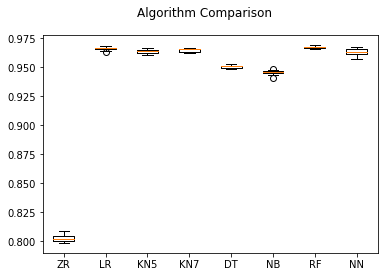



***Examining Features***


Feature names: ['NCD0', 'NCD1', 'NCD2', 'NCD3', 'NCD4', 'NCD5', 'NCD6', 'AI0', 'AI1', 'AI2', 'AI3', 'AI4', 'AI5', 'AI6', 'AS(NA)0', 'AS(NA)1', 'AS(NA)2', 'AS(NA)3', 'AS(NA)4', 'AS(NA)5', 'AS(NA)6', 'BL0', 'BL1', 'BL2', 'BL3', 'BL4', 'BL5', 'BL06', 'NAC0', 'NAC1', 'NAC2', 'NAC3', 'NAC4', 'NAC5', 'NAC6', 'AS(NAC)0', 'AS(NAC)1', 'AS(NAC)2', 'AS(NAC)3', 'AS(NAC)4', 'AS(NAC)5', 'AS(NAC)6', 'CS0', 'CS1', 'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'AT0', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT6', 'NA0', 'NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6', 'ADL0', 'ADL1', 'ADL2', 'ADL3', 'ADL4', 'ADL5', 'ADL6', 'NAD0', 'NAD1', 'NAD2', 'NAD3', 'NAD4', 'NAD5', 'NAD6', 'buzz']
Feature ranking: [ 1  1  1  1 15  1  1  1 23 24  6  3 20 10 33 32 28 27 30 39 26  1  1  1
  1  1  1  1  1  1 31  8  1  5  1 38 36 34 35 37 40 29  1  1  1  1  1  1
  1  1 18 19  2 16 21  1  1  4 22  7  1 11 17  1  1 12 13  1  9  1 25  1
  1  1 14  1  1]


In [2]:


# get data from data frames, as numpy arrays
# note that by convention, we use X for input features
# and lower case y for the target class
array = dataframe.values
X = array[:,0:77]
y = array[:,77]

# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
timeList = []
for name, model in models:
	t1 = time.time()
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	elapsed = time.time() - t1
	print('time 1', elapsed)
	timeList.append(elapsed)
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()

print('\n\n***Examining Features***\n\n')

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",names)
print("Feature ranking:",rfe.ranking_)







### Experiment Continued
The next thing done was to find the standard deviation of each attribute class, like number of authors, over the seven-day period per instance. This dramatically improved the run time but the accuracy per algorithm was slightly lower.

ZR: 0.802604 (0.002867)
elapsed 0.4160315990447998
LR: 0.921113 (0.001627)
elapsed 19.55847191810608
KN5: 0.920281 (0.001709)
elapsed 9.92374587059021
DT: 0.910872 (0.002368)
elapsed 15.700180768966675
NB: 0.923977 (0.002224)
elapsed 1.3971052169799805
RF: 0.936847 (0.001669)
elapsed 279.2480049133301
NN: 0.926748 (0.001824)
elapsed 113.06951069831848


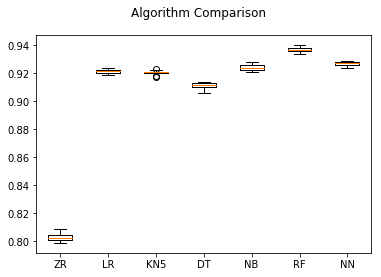



***Examining Features***


Feature names: ['NCD', 'AI', 'ASNAS', 'BL', 'NAC', 'ASNAC', 'CS', 'AT', 'NA', 'ADL', 'NAD', 'Buzz']
Feature ranking: [2 3 5 1 1 6 1 1 4 1 7]


In [3]:
#Create standard deviation of each attribute over course of seven days
NCDArray = array[:, 0:6]
AIArray = array[:, 7:13]
ASNAArray = array[:,14:20]
BLArray = array[:, 21:27]
NACArray= array[:, 28:34]
ASNACArray = array[:, 35:41]
CSArray = array[:, 42:48]
ATArray = array[:, 49:55]
NAArray = array[:, 56:62]
ADLArray = array[:, 63:69]
NADArray = array[:, 70:76]

NCDSTD = NCDArray.std(axis = 1)
AISTD = AIArray.std(axis = 1)
ASNASTD = ASNAArray.std(axis = 1)
BLSTD = BLArray.std(axis = 1)
NACSTD = NACArray.std(axis = 1)
ASNACSTD = ASNACArray.std(axis = 1)
CSSTD = CSArray.std(axis = 1)
ATSTD = ATArray.std(axis = 1)
NASTD = NAArray.std(axis = 1)
ADLSTD = ADLArray.std(axis = 1)
NADSTD = NADArray.std(axis = 1)
buzzCol = array[:, 77]


stdNames = ['NCD', 'AI', 'ASNAS', 'BL', 'NAC', 'ASNAC', 'CS', 'AT', 'NA', 'ADL', 'NAD', 'Buzz']
stdData = {'NCD':NCDSTD, 'AI':AISTD, 'ASNAS':ASNASTD, 'BL':BLSTD, 'NAC':NACSTD, 'ASNAC':ASNACSTD, 
           'CS':CSSTD, 'AT':ATSTD, 'NA':NASTD, 'ADL':ADLSTD, 'NAD':NADSTD, 'Buzz':buzzCol}
stdDF =  pandas.DataFrame(stdData)

stdArray = stdDF.values
X = stdArray[:,0:11]
y = stdArray[:,11]


# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure


resultsSTD = []
classifiersSTD = []
timeListSTD = []
scoring = 'accuracy'
for name, model in models:
	t2 = time.time()
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	resultsSTD.append(cv_results)
	classifiersSTD.append(name)
	msg = "%s: %f (%f)" % (name, cv_results .mean(), cv_results .std())
	print(msg)
	elapsed2 = time.time() - t2
	print('elapsed', elapsed2)
	timeListSTD.append(elapsed)
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultsSTD)
ax.set_xticklabels(classifiersSTD)
plt.show()
   
print('\n\n***Examining Features***\n\n')

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",stdNames)
print("Feature ranking:",rfe.ranking_)



### Experiment Continued
After this, all but the top five standard deviation attributes were removed, and all the algorithms were run again. This was primarily done to improve naive bays and other algorithms that improve with less attributes. This however backfired and the accuracy plummeted, and naive bays performed much worse than zero r. 

ZR: 0.802604 (0.002867)
elapsed 0.24301838874816895
LR: 0.920523 (0.001931)
elapsed 5.798435211181641
KN5: 0.919947 (0.002177)
elapsed 5.220398664474487
DT: 0.906799 (0.002075)
elapsed 4.98336935043335
NB: 0.467020 (0.004130)
elapsed 0.8480629920959473
RF: 0.921880 (0.002315)
elapsed 159.91603064537048
NN: 0.927701 (0.001778)
elapsed 81.46314811706543


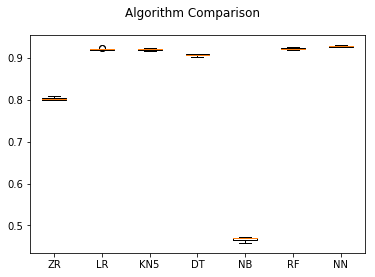



***Examining Features***


Feature names: ['BL', 'NAC', 'CS', 'AT', 'ADL', 'Buzz']
Feature ranking: [1 4 1 2 3]


In [4]:
stdDFDrop = stdDF.drop(columns=['NCD', 'AI', 'ASNAS', 'ASNAC', 'NA', 'NAD'])
stdDropNames = ['BL', 'NAC', 'CS', 'AT', 'ADL', 'Buzz']

stdDropArray = stdDFDrop.values
X = stdDropArray[:,0:5]
y = stdDropArray[:,5]

# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))
# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

resultsSTDDrop = []
classifiersSTDDrop = []
timeListSTDDrop = []
scoring = 'accuracy'
for name, model in models:
	t2 = time.time()
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	resultsSTDDrop.append(cv_results)
	classifiersSTDDrop.append(name)
	msg = "%s: %f (%f)" % (name, cv_results .mean(), cv_results .std())
	print(msg)
	elapsed2 = time.time() - t2
	print('elapsed', elapsed2)
	timeListSTDDrop.append(elapsed)

        
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultsSTDDrop)
ax.set_xticklabels(classifiersSTDDrop)
plt.show()

print('\n\n***Examining Features***\n\n')

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",stdDropNames)
print("Feature ranking:",rfe.ranking_)



### Experiment Continued
The final thing done to the data was to use the top 5 attributes found from the standard deviation tests, burstiness level, number of atomic containers, contribution sparseness, author interactions, and average discussion length. Once these were found their non-standard deviated data so for example burstiness level day 1, burstiness level day2, et cetera was used. 

ZR: 0.802604 (0.002867)
elapsed 1.0010693073272705
LR: 0.965830 (0.001568)
elapsed 94.5871148109436
KN5: 0.963925 (0.001372)
elapsed 58.77342081069946
DT: 0.948610 (0.002065)
elapsed 26.06096053123474
NB: 0.465144 (0.003372)
elapsed 3.2332446575164795
RF: 0.966420 (0.001324)
elapsed 247.90551328659058
NN: 0.802590 (0.002858)
elapsed 13.42099404335022


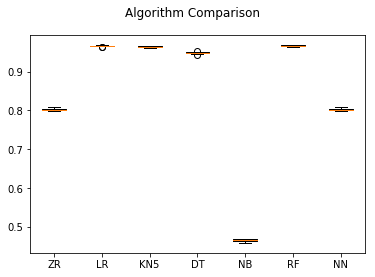



***Examining Features***




C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Feature names: ['BL0', 'BL1', 'BL2', 'BL3', 'BL4', 'BL5', 'BL06', 'NAC0', 'NAC1', 'NAC2', 'NAC3', 'NAC4', 'NAC5', 'NAC6', 'CS0', 'CS1', 'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'AT0', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT6', 'ADL0', 'ADL1', 'ADL2', 'ADL3', 'ADL4', 'ADL5', 'ADL6', 'buzz']
Feature ranking: [ 1  1  1  1  1  1  1  4  7 12 18 17 14  8  1  1  1  9 10  2  1 16  1 13
 15  6  1  1 19  1 11  3  5  1  1]


In [5]:
dropNames =  ['BL0','BL1','BL2','BL3','BL4','BL5','BL06', 'NAC0','NAC1','NAC2','NAC3','NAC4','NAC5','NAC6', 'CS0','CS1',
              'CS2','CS3','CS4','CS5','CS6','AT0', 'AT1','AT2','AT3','AT4','AT5','AT6',
        'ADL0','ADL1','ADL2','ADL3','ADL4','ADL5','ADL6', 'buzz']


dFDrop = dataframe.drop(columns=['NCD0', 'NCD1', 'NCD2', 'NCD3', 'NCD4', 'NCD5', 'NCD6', 'AI0', 'AI1','AI2',
                                 'AI3','AI4','AI5','AI6','AS(NA)0','AS(NA)1','AS(NA)2','AS(NA)3','AS(NA)4',
                                 'AS(NA)5','AS(NA)6', 'AS(NAC)0', 'AS(NAC)1','AS(NAC)2','AS(NAC)3','AS(NAC)4',
                                 'AS(NAC)5', 'NA0','NA1','NA2','NA3','NA4','NA5','NA6','AS(NAC)6','NAD0','NAD1',
                                 'NAD2', 'NAD3','NAD4','NAD5','NAD6'])


dropArray = dFDrop.values
X = dropArray[:,0:35]
y = dropArray[:,35]

# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

timeListDrop = []
resultsDrop = []
classifiersDrop = []
scoring = 'accuracy'
for name, model in models:
	t2 = time.time()
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	resultsDrop.append(cv_results)
	classifiersDrop.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	elapsed2 = time.time() - t2
	print('elapsed', elapsed2)
	timeListDrop.append(elapsed)
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultsDrop)
ax.set_xticklabels(classifiersDrop)
plt.show()
   
print('\n\n***Examining Features***\n\n')

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",dropNames)
print("Feature ranking:",rfe.ranking_)





### Experiment Continued
To compare results t-tests were performed on the most accurate and most time efficient models to decide which model performed best overall. 


In [7]:
print('\n***Performing t-tests***\n\n')

    
ttest,pval = stats.ttest_rel(results[6], resultsDrop[2])
print('P-Val between Random Forest Raw Data and 5NN 35-attribute data: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()    
    




***Performing t-tests***


P-Val between Random Forest Raw Data and 5NN 35-attribute data: 0.00
reject null hypothesis



### Experiment Continued

The algorithms used by this expirement were zero r as a baseline, linear regression, k nearest neighbors with k equal to 5, a decision tree, naive bayes, random forest, and a neural network. Linear regression was chosen because the raw data has a large amount of attributes. Linear regression works well on large amounts of attributes and would also help figure out which attributes to remove for further testing based on their weights. K nearest neighbors was chosen because while it was hard to visualize the data looking through the data in the csv file showed that certain instances had similar values for attributes and their seamed to be clusters. 5 was chosen instead of 7 because after testing both on the raw data they had similar results but 5 had a lower run time. A decision tree was used because the paper who had already learned the data used a random forest which is similar to a decision tree. Naive bayes was used because it performs better on less attributes so it may work well once attributes were simplified and removed. Random forest was used because it is what the authors of a paper that used the same dataset found worked best. Finally, a neural network was used because while it acts like a black box it can sometimes get surprising results. 

### Results

There were multiple algorithms with similar results after manipulating the data. The main differences between the results was the processing time and the number of attributes required. Figure 1 shown below is a plot of all the models run times versus their accuracy. 

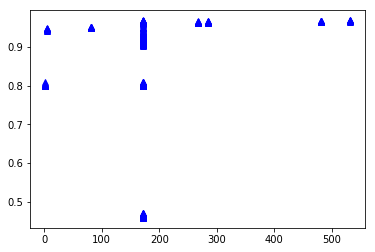

In [6]:

plotResultus = results + resultsSTD + resultsSTDDrop + resultsDrop
plotTimes = timeList + timeListSTD + timeListSTDDrop + timeListDrop
plt.plot(plotTimes, plotResultus,'b^')
plt.axis()
plt.show()

The most accurate performing algorithm was the random forest on the unprocessed data, followed by random forest on the best attributes found from linear regression on the standard deviation over the seven days. The most accurate algorithm with the lowest run time is the 5 nearest neighbor algorithm found with only 35 attributes. 

|    Algorithm    | Accuracy | # of Attributes | Run Time (sec)|
|-----------------|----------|-----------------|---------------|
|  Random Forest  |   96.7   |       77        |      594      |
|  Random Forest  |   96.6   |       35        |      272      |
|Linear Regression|   96.5   |       77        |      518      |
|Linear Regression|   96.5   |       35        |      103      |
|      5-N-N      |   96.4   |       35        |       64      |
|      5-N-N      |   96.3   |       77        |      295      |

                                                      Fig 2. Table of Algorithm
                                                      
From this table it is clear that the best algorithms for this dataset are random forest, linear regression, and 5 nearest neighbors. After running a paired t-test on the 5 nearest neighbor from the manipulated data and the random forest of the raw data it is found that there is no statisticaly significant difference in the two models. As a result the best model for this task found in this paper is 5 nearest neighbors when only considering burstiness level, number of atomic containers, contribution sparseness , author interactions, and average discussion length. This is because it uses the least amount of attributes and has the fastest run time. The model in this experiment also performed better than the model found by  University of Grenoble Joseph Fourier Laboratory of Information which used a random forest with an accuracy of around 90 percent. 

### Conclusions

The best performing model on this data was 5 nearest neighbors when only considering certain attributes over a seven day period. It was accurate around 96 percent of the time and outperformed a research paper on this dataset that was accurate around 90 percent of the time. While nearest neighbor is dependant on the order the instances are learned on, the fact that it worked consistantly well on the dataset with different attributes and number of attributes tells that it was not a fluke that nearest neighbor worked well. Nearest neighbor working well tells that the data is fairly clustered. Because the the number of attributes was cut to 5 attributes from 11 with seven time periods each resulting in 35 total attributes with statistcally insignificant differences tells that those attributes are the main things dividing the data into clusters. The main attributes were burstiness level how many people contributed in a certain amount of time, number of atomic containers, contribution sparseness how spread out over time the discussion was, author interactions how often the author interacted with others, and average discussion length. The attributes that were important were not suprising to me because I thought that interaction and duration of interaction would be imporntant for if a buzz event occured. What was suprising was the model used and that it was necessary to see the the data for each time period. I thought that naives bayes once I lowered the number of attributes. I also thought that the standard deviation of each attribute over multiple time periods would be more important than the actual value during each time period. I thought this because I figured a buzz event would have a high amount of deviation over multiple time periods while if there were no buzz everything would stay consistant.

### Work Cited
[1] Prédictions d’activité dans les réseaux sociaux en ligne (F. Kawala, A. Douzal-Chouakria, E. Gaussier, E. Dimert), In Actes de la Conférence sur les Modèles et l′Analyse des Réseaux : Approches Mathématiques et Informatique (MARAMI), pp. 16, 2013.

[2] Pete Norman. 2019. U.S. Military to Trawl Through 350 Billion Social Media Messages. (May 2019). Retrieved June 13, 2019 from https://www.bloomberg.com/news/articles/2019-05-25/u-s-military-to-trawl-through-350-billion-social-media-messages

[3] Telis Demos. 2018. Wall Street, Hedge Funds Add Social Media to Research Menu. (June 2018). Retrieved June 13, 2019 from https://www.wsj.com/articles/wall-street-hedge-funds-add-social-media-to-research-menu-1528041600

[4] Anon. 2019. Social Media Analytics Market to Reach US$7.8 Bn by 2025; Increasing Active Users to Provide Impetus to Growth - TMR. (June 2019). Retrieved June 13, 2019 from https://finance.yahoo.com/news/social-media-analytics-market-reach-120000333.html 